# RANSAC regression

https://en.wikipedia.org/wiki/Random_sample_consensus

RANSAC is a non-deterministic method for producing a linear regression in the presence of outliers.  It does this by stochastically sampling into 2 sets - inliers and outliers.  The best fit linear regression on the inliers is then selected as the result of the algorithm.  The python implementation allows the number of trials to be set (defaults at 100)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [2]:
X = np.arange(10, 250, 10)
X

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

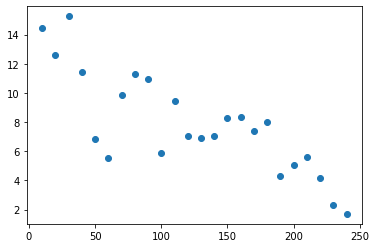

In [7]:
import random

y = []
for i in range(len(X)):
    if random.random() > 0.8:
        y.append(-.05 * X[i] + 15 + (16 * random.random() -8))
    else:
        y.append(-.05 * X[i] + 15 + (4 * random.random() -2))
    
plt.scatter(X, y)
plt.show()

In [8]:
# fit line using all data
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

lr = linear_model.LinearRegression().fit(X, y)

ransac = linear_model.RANSACRegressor().fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [9]:
line_X = np.arange(0,len(X)).reshape(-1, 1)
line_y_lr = lr.predict(X)
line_y_ransac = ransac.predict(X)

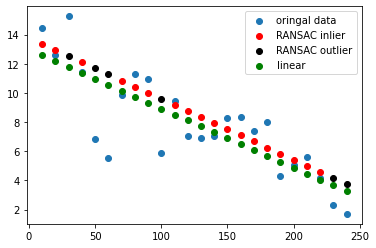

In [10]:


plt.scatter(X, y, label='oringal data')

plt.scatter(X[inlier_mask], line_y_ransac[inlier_mask], color='red', label='RANSAC inlier')
plt.scatter(X[outlier_mask], line_y_ransac[outlier_mask], color='black', label='RANSAC outlier')

plt.scatter(X, line_y_lr, color='green', label='linear')

plt.legend()
plt.show()